In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.8 MB/s eta 0:00:00


####Crea una lista ficticia de 30 transacciones, les asigna montos y países al azar, y marca como "fraude" aquellas que ocurren fuera de Argentina durante la noche.

In [2]:
import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()

# Parámetros del dataset
seed = 42
num_usuarios = 50
monto_minimo = 10.00
monto_maximo = 10000.00
tipos_transaccion = ['Compra', 'Transferencia', 'Retiro', 'Pago Servicio', 'Reembolso']
tipos_comercio = ['Tienda A', 'Online', 'Joyería', 'Restaurante', 'Electrónicos', 'Supermercado', 'Cajero', 'Gasolinera', 'Farmacia', 'Librería']
paises = ['Argentina', 'Estados Unidos', 'España', 'México', 'Colombia', 'Chile']

nombres_usuarios = [fake.name() for _ in range(num_usuarios)]

# Generación de datos para transacciones
num_transacciones = 30
ids_transaccion = range(1, num_transacciones + 1)
montos = [round(random.uniform(monto_minimo, monto_maximo), 2) for _ in range(num_transacciones)]
# Simulación de tiempo de transacción como una fecha y hora aleatoria
fechas_transaccion = [datetime.now() - timedelta(minutes=random.randint(1, 1440)) for _ in range(num_transacciones)] #Hasta 1 dia atras.
tipos_transaccion_list = [random.choice(tipos_transaccion) for _ in range(num_transacciones)]
tipos_comercio_list = [random.choice(tipos_comercio) for _ in range(num_transacciones)]
paises_list = [random.choice(paises) for _ in range(num_transacciones)]
#Inicializo en cero.
es_fraude_list = [0] * num_transacciones

# Lógica para detectar transacciones fraudulentas
for i in range(num_transacciones):
    hora_transaccion = fechas_transaccion[i].hour
    pais_transaccion = paises_list[i]

    # Verificar si la transacción es fuera de Argentina y en horario nocturno
    if pais_transaccion != 'Argentina' and (hora_transaccion >= 22 or hora_transaccion < 6):
        es_fraude_list[i] = 1

# Creación del DataFrame
data_transacciones = {
    'ID_Transaccion': ids_transaccion,
    'Usuario': [random.choice(nombres_usuarios) for _ in range(num_transacciones)],
    'Monto': montos,
    'Fecha_Hora_Transaccion': fechas_transaccion,
    'Tipo_Transaccion': tipos_transaccion_list,
    'Tipo_Comercio': tipos_comercio_list,
    'Pais': paises_list,
    'Es_Fraude': es_fraude_list
}

df_transacciones = pd.DataFrame(data_transacciones)

# Guardar el DataFrame a un archivo CSV
nombre_archivo_csv = 'datos_tarjetas.csv'
df_transacciones.to_csv(nombre_archivo_csv, index=False)

print(f"El DataFrame se ha guardado correctamente como '{nombre_archivo_csv}'.")

# Mostrar las primeras filas del DataFrame para verificar
df_transacciones

El DataFrame se ha guardado correctamente como 'datos_tarjetas.csv'.


,ID_Transaccion,Usuario,Monto,Fecha_Hora_Transaccion,Tipo_Transaccion,Tipo_Comercio,Pais,Es_Fraude
0,1,Kevin Sims,4564.41,2025-12-19 13:14:27.951912,Retiro,Restaurante,Estados Unidos,0
1,2,Kevin Webb,9945.53,2025-12-19 18:37:27.951949,Reembolso,Restaurante,Argentina,0
2,3,Kevin Sims,4435.34,2025-12-19 15:01:27.951958,Retiro,Tienda A,Chile,0
3,4,Melissa Chavez,6841.79,2025-12-19 12:49:27.951964,Pago Servicio,Librería,España,0
4,5,Manuel Thomas,6044.18,2025-12-19 19:55:27.951969,Retiro,Farmacia,México,0
5,6,Jessica Carrillo,1892.78,2025-12-19 20:17:27.951973,Reembolso,Farmacia,España,0
6,7,Jeffrey Adams,8452.01,2025-12-20 08:41:27.951978,Retiro,Tienda A,España,0
7,8,James Nolan,9776.86,2025-12-20 12:03:27.951982,Compra,Cajero,Argentina,0
8,9,Ashley Williams,2098.08,2025-12-19 12:44:27.951986,Reembolso,Joyería,México,0
9,10,Lori Price,5686.34,2025-12-19 20:26:27.951990,Reembolso,Librería,España,0


###**Algoritmo Anti-Fraude 360**


Análisis Exploratorio de Datos:
       ID_Transaccion        Monto  Es_Fraude  Hora_Transaccion
count       30.000000    30.000000  30.000000         30.000000
mean        15.500000  4832.307000   0.266667         10.800000
std          8.803408  3224.680032   0.449776          6.789444
min          1.000000    13.210000   0.000000          0.000000
25%          8.250000  1944.105000   0.000000          4.500000
50%         15.500000  5047.380000   0.000000         11.500000
75%         22.750000  7160.817500   0.750000         17.500000
max         30.000000  9945.530000   1.000000         20.000000

Conteo de clases en Es_Fraude:
Es_Fraude
0    22
1     8
Name: count, dtype: int64


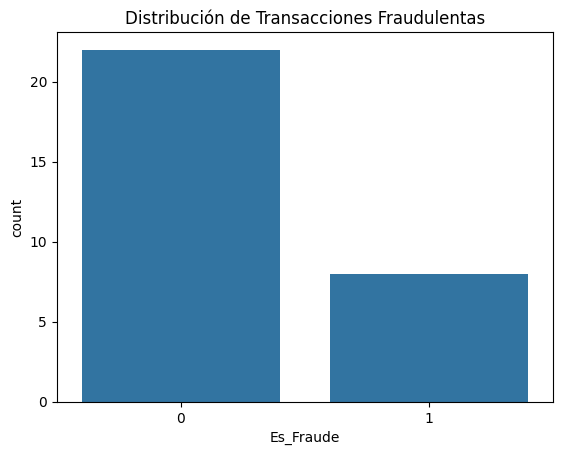

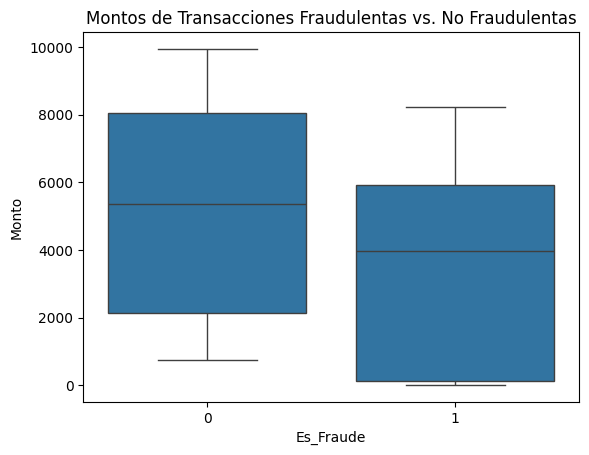


Modelo de Regresión Logística:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9

Precisión: 0.8888888888888888

Modelo de Random Forest:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9

Precisión: 0.8888888888888888

Conclusiones y Operaciones Sospechosas:

Las 10 caracteristicas mas importantes son:
 Hora_Transaccion              0.333183
Pais_Colombia                 0.108406
Monto                         0.085835
Tipo_Comercio_Joyería   

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings

# Configuración para limpiar la consola de advertencias
warnings.filterwarnings("ignore")

# 1. Cargar el dataset de transacciones fraudulentas
# Asegúrate de que el archivo 'datos_tarjetas.csv' esté en tu carpeta de Colab
df_tarjetas = pd.read_csv('datos_tarjetas.csv')

# Pre-procesamiento de hora necesario para el análisis
df_tarjetas['Hora_Transaccion'] = pd.to_datetime(df_tarjetas['Fecha_Hora_Transaccion']).dt.hour

# 2. Análisis Exploratorio de Datos (EDA)
print("\nAnálisis Exploratorio de Datos:")
# Mostramos estadísticas de las columnas numéricas principales
print(df_tarjetas[['ID_Transaccion', 'Monto', 'Es_Fraude', 'Hora_Transaccion']].describe())
print("\nConteo de clases en Es_Fraude:")
print(df_tarjetas['Es_Fraude'].value_counts())

# Visualizaciones (opcional, pero recomendadas para el reporte)
sns.countplot(x='Es_Fraude', data=df_tarjetas)
plt.title('Distribución de Transacciones Fraudulentas')
plt.show()

sns.boxplot(x='Es_Fraude', y='Monto', data=df_tarjetas)
plt.title('Montos de Transacciones Fraudulentas vs. No Fraudulentas')
plt.show()

# 3. Preprocesamiento de Datos para el Modelo
# Incluimos 'Usuario' en dummies como en tu salida anterior
df_encoded = pd.get_dummies(df_tarjetas, columns=['Tipo_Comercio', 'Pais', 'Usuario', 'Tipo_Transaccion'], drop_first=True)
df_encoded = df_encoded.drop(columns=['ID_Transaccion', 'Fecha_Hora_Transaccion'])

# 4. Separación de Datos en Entrenamiento y Prueba
X = df_encoded.drop('Es_Fraude', axis=1)
y = df_encoded['Es_Fraude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Escalado de Características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Modelos de Detección de Fraude

# 6.1 Regresión Logística
print("\nModelo de Regresión Logística:")
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
# Usamos zero_division=0 para evitar la advertencia si el modelo no predice una clase
print(classification_report(y_test, y_pred_lr, zero_division=0))
print(f"Precisión: {accuracy_score(y_test, y_pred_lr)}")

# 6.2 Random Forest
print("\nModelo de Random Forest:")
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf, zero_division=0))
print(f"Precisión: {accuracy_score(y_test, y_pred_rf)}")

# 7. Conclusiones y operaciones sospechosas
print("\nConclusiones y Operaciones Sospechosas:")

# Características importantes del Random Forest
feature_importance = pd.Series(model_rf.feature_importances_, index=X_train.columns)
print("\nLas 10 caracteristicas mas importantes son:\n", feature_importance.nlargest(10))

print("\noperaciones sospechosas detectadas:")
# Obtenemos las probabilidades
rf_pred_probabilities = model_rf.predict_proba(X_test_scaled)[:, 1]

# Ajustamos el umbral a 0.5 para asegurar que capturemos sospechas en datasets pequeños
umbral = 0.5
transacciones_sospechosas = X_test[rf_pred_probabilities >= umbral]

if transacciones_sospechosas.empty:
    print("No se encontraron transacciones que superen el umbral de confianza.")
else:
    # Añadimos la probabilidad para mayor claridad
    transacciones_sospechosas['Probabilidad_Fraude'] = rf_pred_probabilities[rf_pred_probabilities >= umbral]
    print(transacciones_sospechosas.head())

print("\nLas predicciones del Random forest suelen tener una precisión más alta y detectan mejor el fraude en datos complejos.")